# What sells a car?

We are analysts of an ads website for second hand vehicles. Hundreds of free vehicle ads are posted on our website every day. We need to study the data collected over the past few years and determine what factors influence the price of a vehicle.

# Contents <a id='back'></a>

* [Intro](#intro)
* [Stage 1. Data description](#data_review)
    * [1.1 Explore initial data](#initial_data)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 Handle missing values (if any)](#handle_miss_values)
    * [2.2 Correcting data types](#correct_data_types)
    * [2.3  Enriching data](#Enriching_data)
    * [2.4 Checking clean data](#Checking_clean_data)
* [Stage 3. Exploratory data analysis](#exploratory_data_analysis)
    * [3.1 Studying and working the outliers](#Studying_working_outliers)
    * [3.2 Studying main parameters with outliers filtration](#Studying_main_parameters_with_outliers_filtration)
    * [3.3 Ad placement period](#Ad_placement_period)
    * [3.4 Average price for each type of vehicle](#avg_price_per_vehicle)
    * [3.5 Price factor](#price_factor)
* [Conclusion](#conclusion)

## Introduction <a id='intro'></a>

In this exercise we are going to analyze a dataframe reporting several car selling publications.
The aim is to find out which features are the most correlated with the price of the vehicle.
To achieve our goal we will follow these steps:
- Collecting data
- Preparing data
- Finding one or more solution prototype
- Presenting the solution with graphics/diagrams

## Stage 1. Data description <a id='data_review'></a>

In [1]:
# Loading all libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data file into a DataFrame
df = pd.read_csv('/Users/vidam/Desktop/PRACTICUM/Proyecto_3/vehicles_us.csv')
#df = pd.read_csv('/datasets/vehicles_us.csv')

### 1.1 Explore initial data <a id='initial_data'></a>

The dataset contains the following fields:
- `price`
- `model_year`
-`model`
- `condition`
- `cylinders`
- `fuel` — gasoline, diesel, etc.
- `odometer` — the mileage of the vehicle when the ad was posted
- `transmission`
- `paint_color`
- `is_4wd` — if the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was posted
- `days_listed` — from post to deletion

In [3]:
# printing the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# printing a data sample
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Lets have a deeper view of the data

In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


So, we have a 51525x13 dataframe.By quickly reviewing the first lines we can see absent values in 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd' column. The emptiest column is 'is_4wd'. 
Other weird thing is that values in 'model_year', 'cylinders' and 'is_4wd' are float instead of int and date columns are type object instead of datetime64

Next step will be rearrange as int values the 'model_year', 'cylinders', 'odometer' and 'is_4wd' columns. After that we dive into the columns with absent values, evaluate the possible cause and think about a way to replace them.

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>

### 2.1 Handle missing values (if any) <a id='handle_miss_values'></a>

Let's work on the column 'model_year'. We'll see what values there are in it, how many null value and the best way to replace them

In [6]:
df['model_year'].sort_values().unique()

array([1908., 1929., 1936., 1948., 1949., 1954., 1955., 1958., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019.,   nan])

it seems there are reasonable year in it, maybe someone very old (more than a century) but still reasonable.

In [7]:
df['model_year'].isna().sum()

3619

We notice that there are 3619 absent values in "model_year". To replace them I think the best thing to do evaluate the mileage of similar vehicles but before we must be sure that we have the 'odometer' value within the rows where 'model_year' is missing.

We now apply multiple conditions to filter data in "model_year" and "odometer" columns to see if we can use the "odometer" column to replace the null values in "model_year"

In [8]:
filtro_model_year = df['model_year'].isna()
filtro_odometer = df['odometer'].isna()
comb_1 = df[filtro_model_year & filtro_odometer]

len(comb_1)

549

Nope, we can't use 'odometer' values to help replacing the absent values in 'model_year'. The second best option is using pricing category of similar vehicles.

Lets do the same as we did just before:

In [9]:
filtro_model_year = df['model_year'].isna()
filtro_price = df['price'].isna()
comb_2 = df[filtro_model_year & filtro_price]

len(comb_2)

0

Ok, we are sure that, when we do not have the 'model_year' value in a row, we do have 'price' value. 

And now we will replace the null values in 'model_year' with the median value of the corresponding 'model'.

In [10]:
def my_lambda(x):
    return x.fillna(x.median())

model_year_meds = df.groupby(['model'])['model_year'].transform(lambda x: my_lambda(x))


df['model_year'] = df['model_year'].fillna(model_year_meds)

To simplify things up, lets take the int of every value and verify them again

In [11]:
df['model_year'] = df['model_year'].astype(int)
df['model_year'].sort_values().unique()

array([1908, 1929, 1936, 1948, 1949, 1954, 1955, 1958, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

Let's skip now to the second column with null-values 'cylinders'. We proceed in a similar way as 'model_year'

In [12]:
df['cylinders'].sort_values().unique()

array([ 3.,  4.,  5.,  6.,  8., 10., 12., nan])

And now we will replace the null values in 'cylinders' with the mean value of the corresponding 'model'.

In [13]:
def my_lambda(y):
    return y.fillna(y.median())

cylinders_meds = df.groupby(['model'])['cylinders'].transform(lambda y: my_lambda(y))

df['cylinders'] = df['cylinders'].fillna(cylinders_meds).round().astype(int)

We verify the final values to see if the null values are gone

In [14]:
df['cylinders'].sort_values().unique()

array([ 3,  4,  5,  6,  8, 10, 12])

Ok, let's skip now to the third column with null-values 'odometer'. We proceed in a similar way as 'model_year'

In [15]:
def my_lambda(z):
    return z.fillna(z.median())

odometer_meds = df.groupby(['condition'])['odometer'].transform(lambda z: my_lambda(z))

df['odometer'] = df['odometer'].fillna(odometer_meds)

In [16]:
df['odometer'] = df['odometer'].round().astype(int)

Next column with null values is 'paint_color'. So lets dive into it

In [17]:
df['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

All colors are reasonable but there's an exception: 'custom' does not mean anything per se. So, we will use "custom" to replace null_values

In [18]:
df['paint_color'] = df['paint_color'].fillna('custom')

Lets verify the effective replacing:

In [19]:
df['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow'], dtype=object)

Ok! We now skip to 'is_4wd' column.
In this case, since we have a boolean and there are only 1 in the column we can assume that the missing values are zeros. Since the type of this column is float we also change it to boolean

In [20]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'] = df['is_4wd'].astype('bool')

### 2.2 Correcting data types <a id='correct_data_types'></a>


After the previous operations, lets see the dataframe info 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int32(3), int64(2), object(7)
memory usage: 4.2+ MB


We have now a totally filled dataframe. The only weird thing is that "date_posted" type is object instead of datetime64. Lets work it

In [22]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%dT%H:%M:%S')

Now we verify:

In [23]:
df['date_posted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: date_posted
Non-Null Count  Dtype         
--------------  -----         
51525 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 402.7 KB


Ok, well done!

### 2.3 Enriching data <a id='Enriching_data'></a>

Lets have the age of the vehicle when the post was placed and insert it in a new column "car_age"

In [24]:
# Adding the years of the vehicle when the ad was placed
date_col = pd.DatetimeIndex(df['date_posted'])
df['car_age'] = date_col.year - df['model_year']

Lets now verify it using describe()

In [25]:
df['car_age'].describe()

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

Ok, "car_age" column seems reasonable. Only thing we'll do is replacing its zeros to one and since we have to do this on zeros we should do the same for all the column.

In [26]:
df['car_age'] = df['car_age'] + 1

And now the vehicle mileage per year

In [27]:
# Adding average vehicle mileage per year
df['miles/year'] = (df['odometer'] / df['car_age']).round(0)
df['miles/year'] = df['miles/year'].astype('int')

It might be useful to replace the condition values with something that can be more easily manipulated. So lets do it

In [28]:
# It might be useful to replace the condition values with something that can be more easily manipulated
def condition_index(condition):
    """
    The function returns the condition index according to the previous analysis, using the following rules:
    — index = 5 (max) for 'new' condition
    — index = 4 for 'like new' condition
    — index = 3 for 'excelent' condition
    — index = 2 for 'good' condition
    — index = 1 for 'fair' condition
    — index = 0 (min) for 'salvage' condition
    """
    
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0

Let's create a new column 'condition_ind' using the previous function

In [29]:
df['condition_ind'] = df['condition'].map(condition_index)

Lets find now the day of the week when the vehicle has been posted and add it in a new column "day_posted"

In [30]:
df['day_posted'] = df['date_posted'].dt.weekday

The same with month:

In [31]:
df['month_posted'] = df['date_posted'].dt.month

### 2.4 Checking clean data <a id='Checking_clean_data'></a>

Since the data is ready for analysis, we take another quick look at it. It is useful to see what exactly we are going to use for analysis.

In [32]:
# printing the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int32         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int32         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  int32         
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  bool          
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  car_age        51525 non-null  int64         
 14  miles/year     51525 non-null  int32         
 15  condition_ind  5152

In [33]:
# printing a data sample
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,miles/year,condition_ind,day_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,custom,True,2018-06-23,19,8,18125,2,5,6
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088,2,4,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714,4,3,2
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,custom,False,2019-03-22,9,17,10683,1,4,3
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26968,3,1,4


## Stage 3. Exploratory data analysis <a id='exploratory_data_analysis'></a>

We are now going to study the parameters listed below, paying special attention to how outliers affect the shape histograms.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

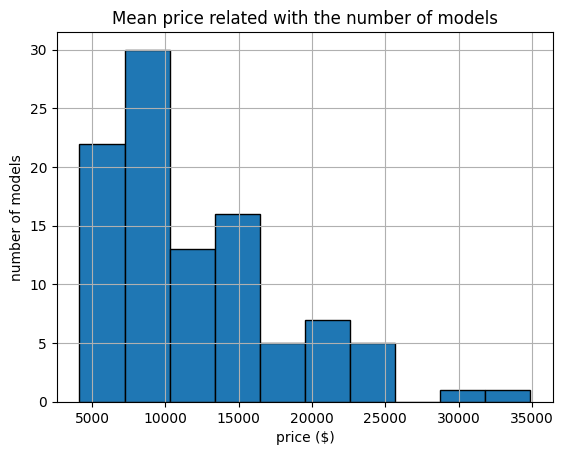

In [34]:
mean_price = df.pivot_table(index='model', values='price')
mean_price.hist(edgecolor = 'black')
plt.title('Mean price related with the number of models')
plt.xlabel('price ($)')
plt.ylabel('number of models')
plt.show()

In the last graph, the horizontal axis tells us the price, while the vertical axis tells us the number of each model (100 in total) with average prices in each interval.We see that there are two little bars detached. This may be due to outliers.

Lets now do the same things but this time in the y-axis there'll be the brute number of vehicles.

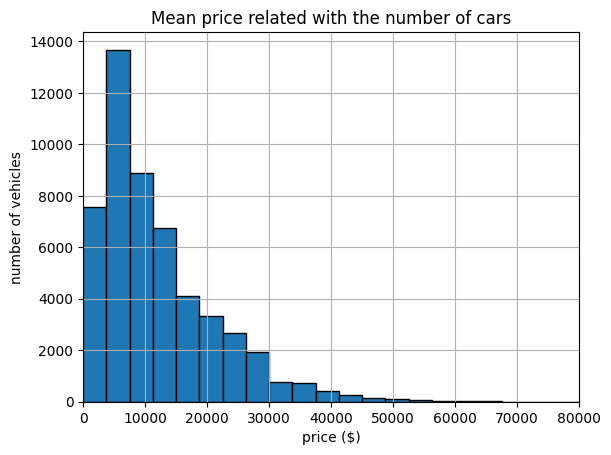

In [35]:
df.hist('price', bins=100, edgecolor = 'black')
plt.xlim(0, 80000)
plt.title('Mean price related with the number of cars')
plt.xlabel('price ($)')
plt.ylabel('number of vehicles')
plt.show()

In this case, is quite hard to recognize any outliers

Lets repeat the process with the car_age column

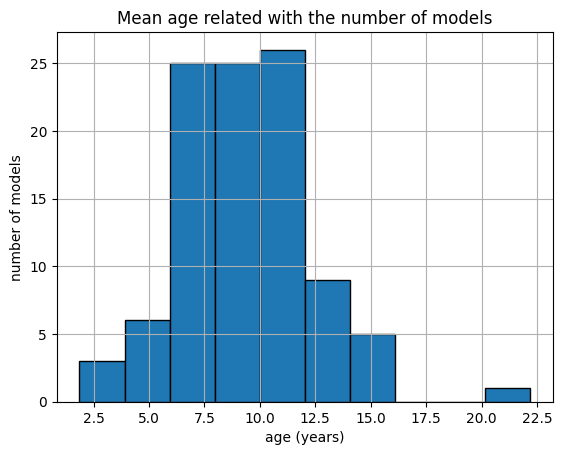

In [36]:
mean_car_age = df.pivot_table(index='model', values='car_age')
mean_car_age.hist(edgecolor = 'black')
plt.title('Mean age related with the number of models')
plt.xlabel('age (years)')
plt.ylabel('number of models')
plt.show()

Im this last there's definitely some outliers due to the little bar on the right

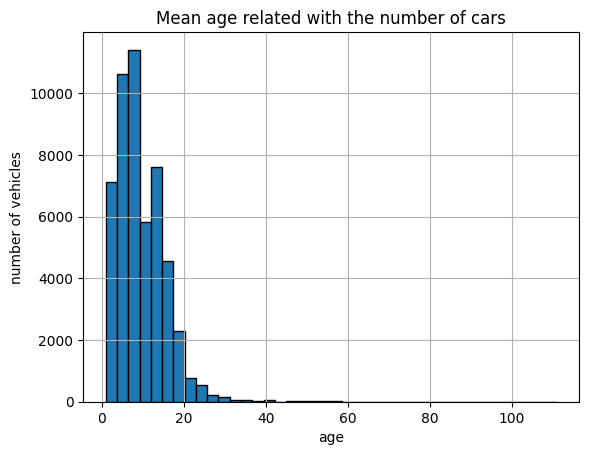

In [37]:
df.hist('car_age', bins=40, edgecolor = 'black')
plt.title('Mean age related with the number of cars')
plt.xlabel('age')
plt.ylabel('number of vehicles')
plt.show()

Lets repeat the process with the odometer column

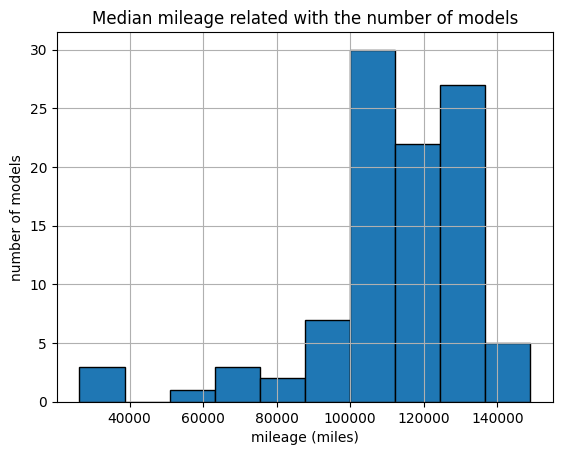

In [38]:
median_mileage = df.pivot_table(index='model', values='odometer', aggfunc='median')
median_mileage.hist(edgecolor = 'black')
plt.title('Median mileage related with the number of models')
plt.xlabel('mileage (miles)')
plt.ylabel('number of models')
plt.show()

It seems there are no outliers in this last histograms 

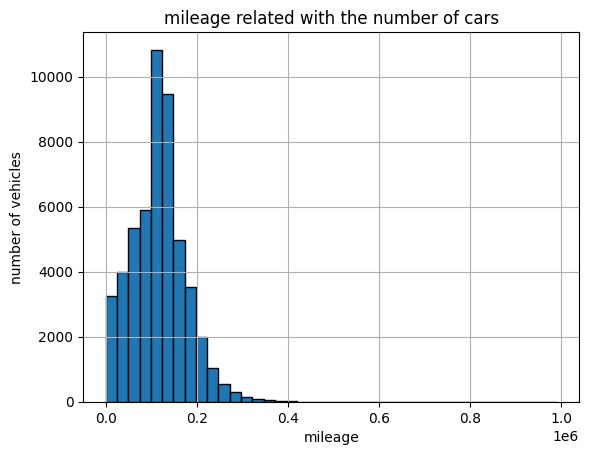

In [39]:
df.hist('odometer', bins=40, edgecolor = 'black')
plt.title('mileage related with the number of cars')
plt.xlabel('mileage')
plt.ylabel('number of vehicles')
plt.show()

Lets analyze now the cylinder column. In this case, we use another method because there are not engines with floating number of cylinders so it is better that we avoid dynamic table.

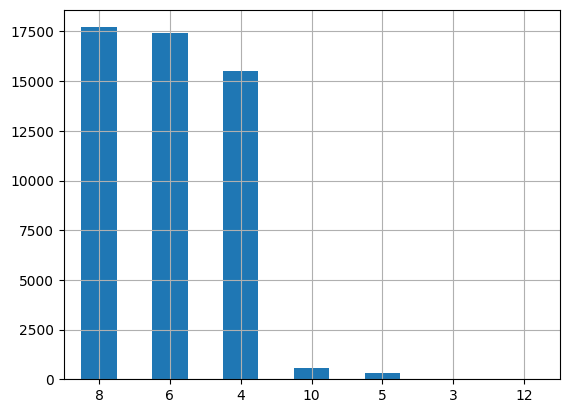

In [40]:
df['cylinders'].value_counts().plot(kind='bar', grid=True)
plt.xticks(rotation=0)
plt.show()

There's not much to say about it. We see that most of cars ~17500 are 8 cylinders and less than 1000 are 7, 5 and 10 cylinders. Very few ones have 3, 9 or 12 cylinders

We do the same with the condition column

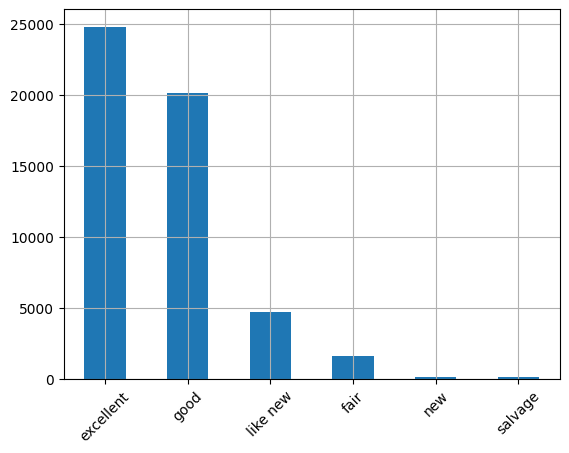

In [41]:
df['condition'].value_counts().plot(kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

Ok then, the majority of cars are in excellent conditon and very few ones are in savage condition

### 3.1 Studying and working the outliers <a id='Studying_working_outliers'></a>

Next step is creating a DataFrame without outliers. The outliers can be identified after defining the lower/upper bound for the normal range of values.

Before doing that, lets see the outliers model by model in relation with price and mean age 

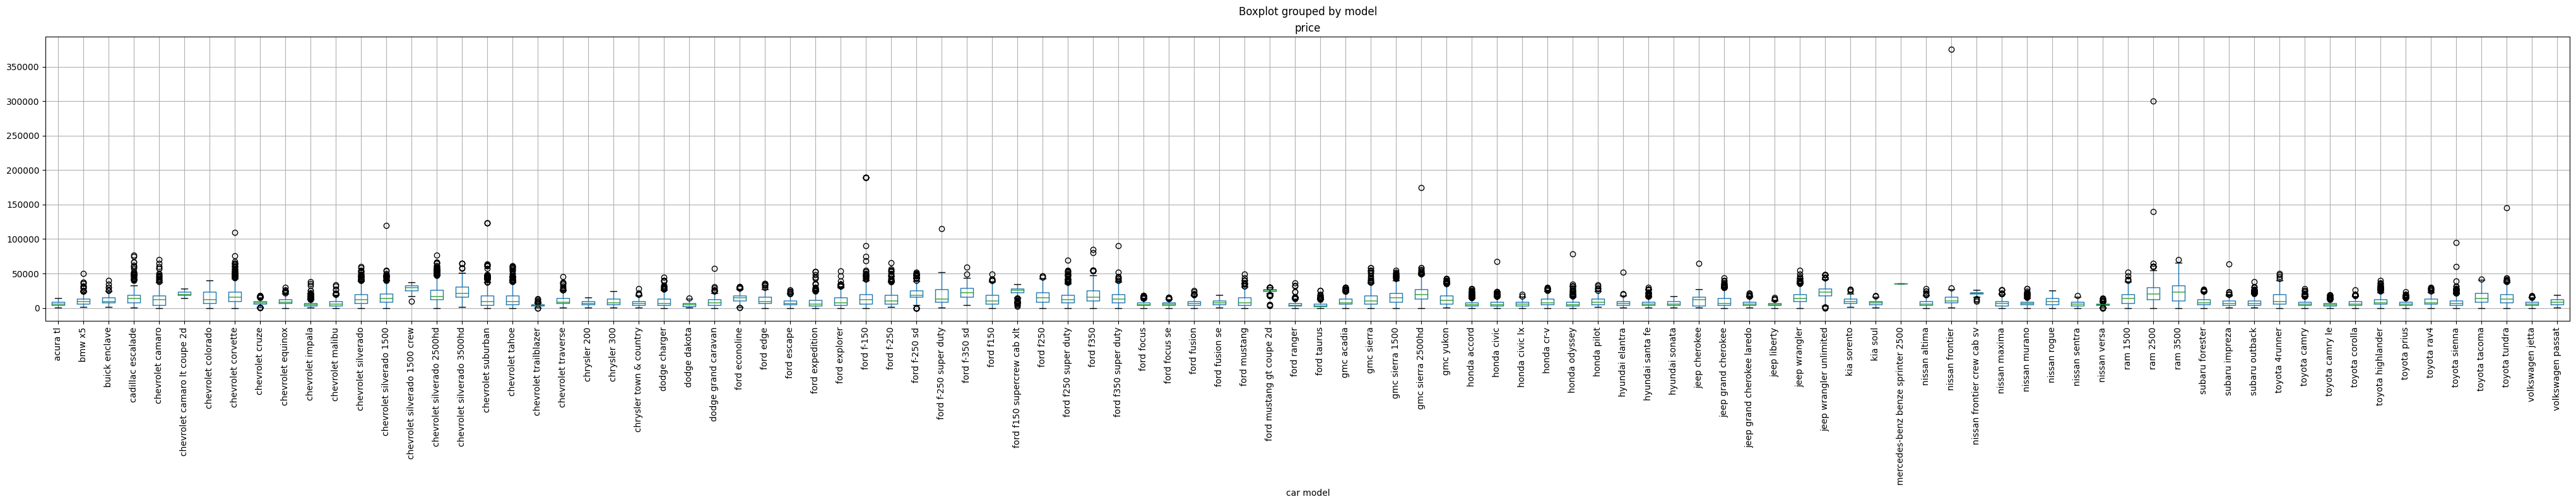

In [42]:
df.boxplot(column='price', by='model', figsize=(50, 6))
plt.xticks(rotation=90)
plt.xlabel('car model')
plt.show()

Cool! we have definitely a better perspective now

If the analysis model by model is not important for us, then the following boxplot is more appropriate

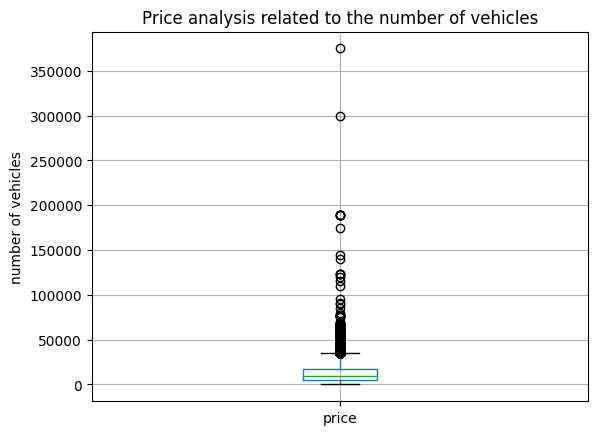

In [43]:
df.boxplot(column='price')
plt.title('Price analysis related to the number of vehicles')
plt.ylabel('number of vehicles')
plt.show()

Lets repeat the process with average car age:

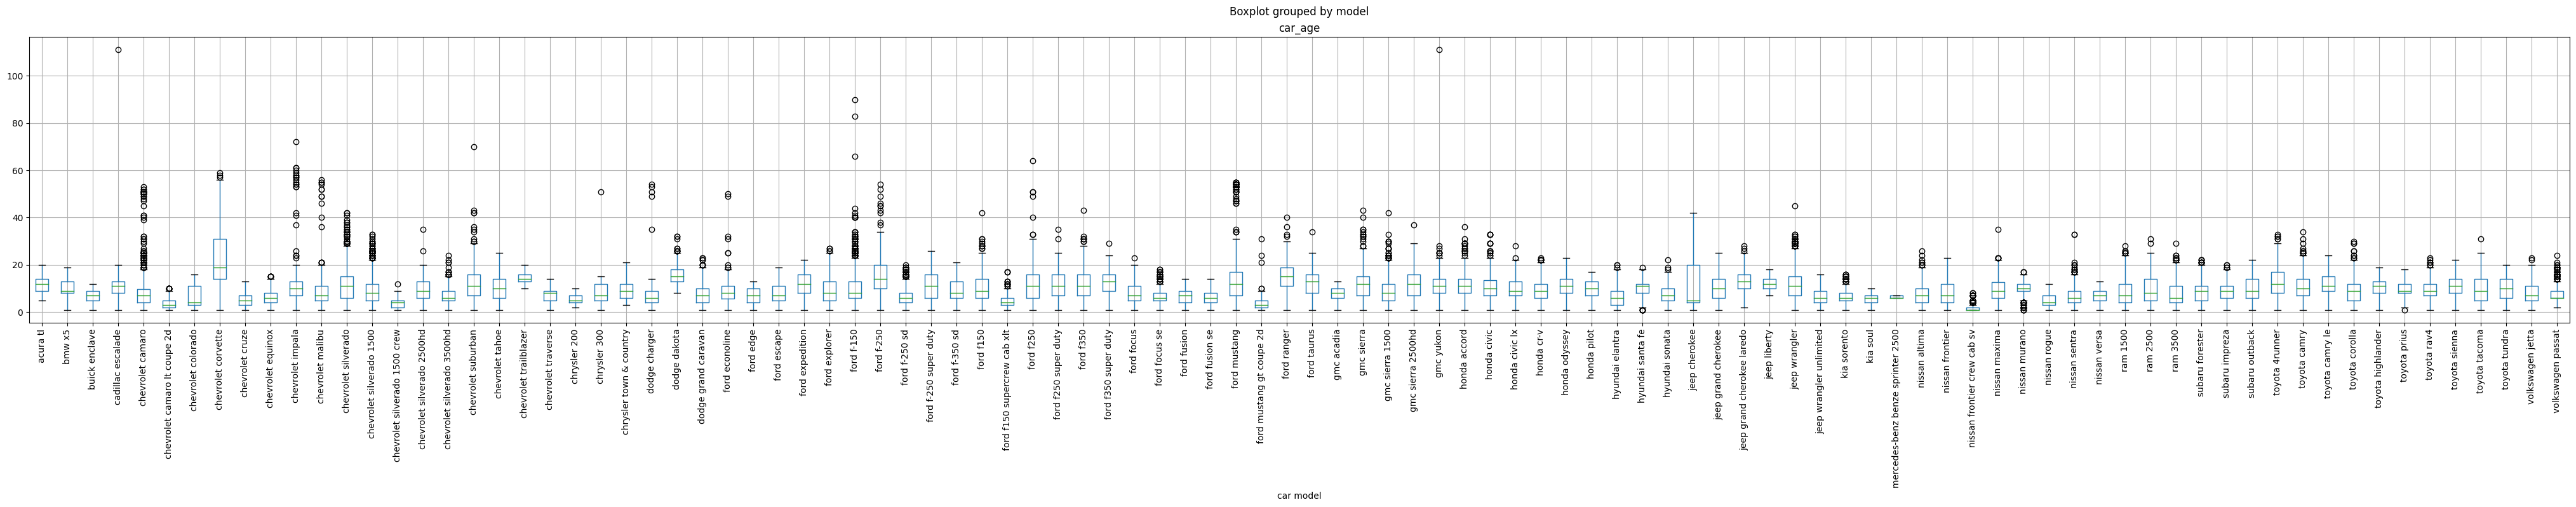

In [44]:
df.boxplot(column='car_age', by='model', figsize=(50, 6))
plt.xticks(rotation=90)
plt.xlabel('car model')
plt.show()

If the analysis model by model is not important for us, then the following boxplot is more appropriate

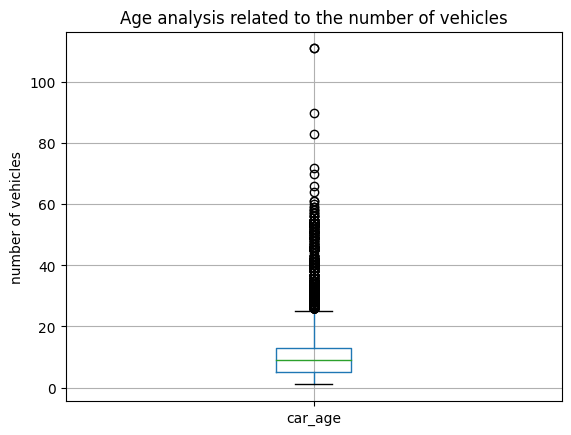

In [45]:
df.boxplot(column='car_age')
plt.title('Age analysis related to the number of vehicles')
plt.ylabel('number of vehicles')
plt.show()

Now we are going to work on the outliers. Lets begin to the ones related to price

Since we are working model by model, first step is create a table that contains lower quartile, upper quartile, median, upper and lower bound for every car model.

In [46]:
table_price = df.groupby("model")["price"].describe()
table_price["upper_bound"] = table_price["75%"] + 1.5*(table_price["75%"] - table_price["25%"])
table_price["lower_bound"] = table_price["25%"] - 1.5*(table_price["75%"] - table_price["25%"])
table_price

,count,mean,std,min,25%,50%,75%,max,upper_bound,lower_bound
model,,,,,,,,,,
acura tl,236.0,6474.500000,3240.788113,800.0,3999.75,5900.0,8499.00,14498.0,15247.875,-2749.125
bmw x5,267.0,10695.891386,6833.865394,1300.0,5700.00,9775.0,12997.50,50000.0,23943.750,-5246.250
buick enclave,271.0,11439.612546,5740.748830,1250.0,7925.00,9995.0,14990.00,40264.0,25587.500,-2672.500
cadillac escalade,322.0,17032.059006,13892.102102,500.0,7999.00,13995.0,18650.00,76995.0,34626.500,-7977.500
chevrolet camaro,414.0,13284.961353,11382.422285,1.0,4000.00,11961.0,17500.00,69900.0,37750.000,-16250.000
...,...,...,...,...,...,...,...,...,...,...
toyota sienna,329.0,9046.838906,8705.216070,1.0,3995.00,6495.0,10999.00,94955.0,21505.000,-6511.000
toyota tacoma,827.0,15473.817412,8443.267233,1.0,8991.50,13995.0,21942.50,42000.0,41369.000,-10435.000
toyota tundra,603.0,14715.633499,10771.073961,1.0,7800.00,13500.0,19625.00,145000.0,37362.500,-9937.500


Now we are going to filter the original dataframe with the values just found 

To do so, we initialize a new empty dataframe (df_price_filtered) and fill it row by row using a for cycle

In [47]:
df_price_filtered = pd.DataFrame()

for model in df['model'].unique():
    new_df =df.loc[ (df['model'] == model) & (df['price'] < table_price.loc[model, "upper_bound"]) & (df['price'] > table_price.loc[model, "lower_bound"])]
    df_price_filtered = df_price_filtered.append(new_df)

C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\2826279322.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_filtered = df_price_filtered.append(new_df)
C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\2826279322.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_filtered = df_price_filtered.append(new_df)
C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\2826279322.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_filtered = df_price_filtered.append(new_df)
C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\2826279322.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_filtered = df_price_filt

We have now a one time (by the price) filtered dataframe. Lets see the size of this new dataframe

In [48]:
df_price_filtered.shape

(49893, 18)

So 1632 rows have been filtered

Now, lets take the price filtered dataframe and filter it by the average age

In [49]:
table_age = df_price_filtered.groupby("model")["car_age"].describe()
table_age["upper_bound"] = table_age["75%"] + 1.5*(table_age["75%"] - table_age["25%"])
table_age["lower_bound"] = table_age["25%"] - 1.5*(table_age["75%"] - table_age["25%"])
table_age

,count,mean,std,min,25%,50%,75%,max,upper_bound,lower_bound
model,,,,,,,,,,
acura tl,236.0,11.788136,3.252107,5.0,9.0,12.0,14.0,20.0,21.5,1.5
bmw x5,251.0,10.621514,3.475079,4.0,8.0,10.0,13.0,19.0,20.5,0.5
buick enclave,265.0,7.233962,2.317174,2.0,5.0,7.0,9.0,12.0,15.0,-1.0
cadillac escalade,285.0,11.771930,6.823266,3.0,9.0,11.0,14.0,111.0,21.5,1.5
chevrolet camaro,397.0,10.073048,9.995060,1.0,5.0,7.0,9.0,53.0,15.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
toyota sienna,306.0,11.287582,4.270637,2.0,9.0,12.0,14.0,22.0,21.5,1.5
toyota tacoma,826.0,9.916465,5.592120,1.0,5.0,9.0,14.0,31.0,27.5,-8.5
toyota tundra,593.0,10.104553,4.875739,1.0,6.0,10.0,14.0,20.0,26.0,-6.0


Now we are going to filter the price filtered dataframe (df_price_filtered) with the values just found 

To do so, we initialize a new empty dataframe (df_price_age_filtered) and fill it row by row using a for cycle

In [50]:
df_price_age_filtered = pd.DataFrame()

for model in df_price_filtered['model'].unique():
    new_df2 =df_price_filtered.loc[ (df_price_filtered['model'] == model) & (df_price_filtered['car_age'] < table_age.loc[model, "upper_bound"]) & (df_price_filtered['car_age'] > table_age.loc[model, "lower_bound"])]
    df_price_age_filtered = df_price_age_filtered.append(new_df2)

C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\915864728.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_age_filtered = df_price_age_filtered.append(new_df2)
C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\915864728.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_age_filtered = df_price_age_filtered.append(new_df2)
C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\915864728.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_age_filtered = df_price_age_filtered.append(new_df2)
C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\915864728.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_a

We have now a two times (by the price and age) filtered dataframe. Lets see the size of this new dataframe

In [51]:
df_price_age_filtered.shape

(48893, 18)

Other 1000 lines have been filtered and so we have (1632 + 1000) 2632 rows less than the original dataframe

Lets now plot the new filtered dataframes, the first two taking into account the model by model and the others with no discrimination

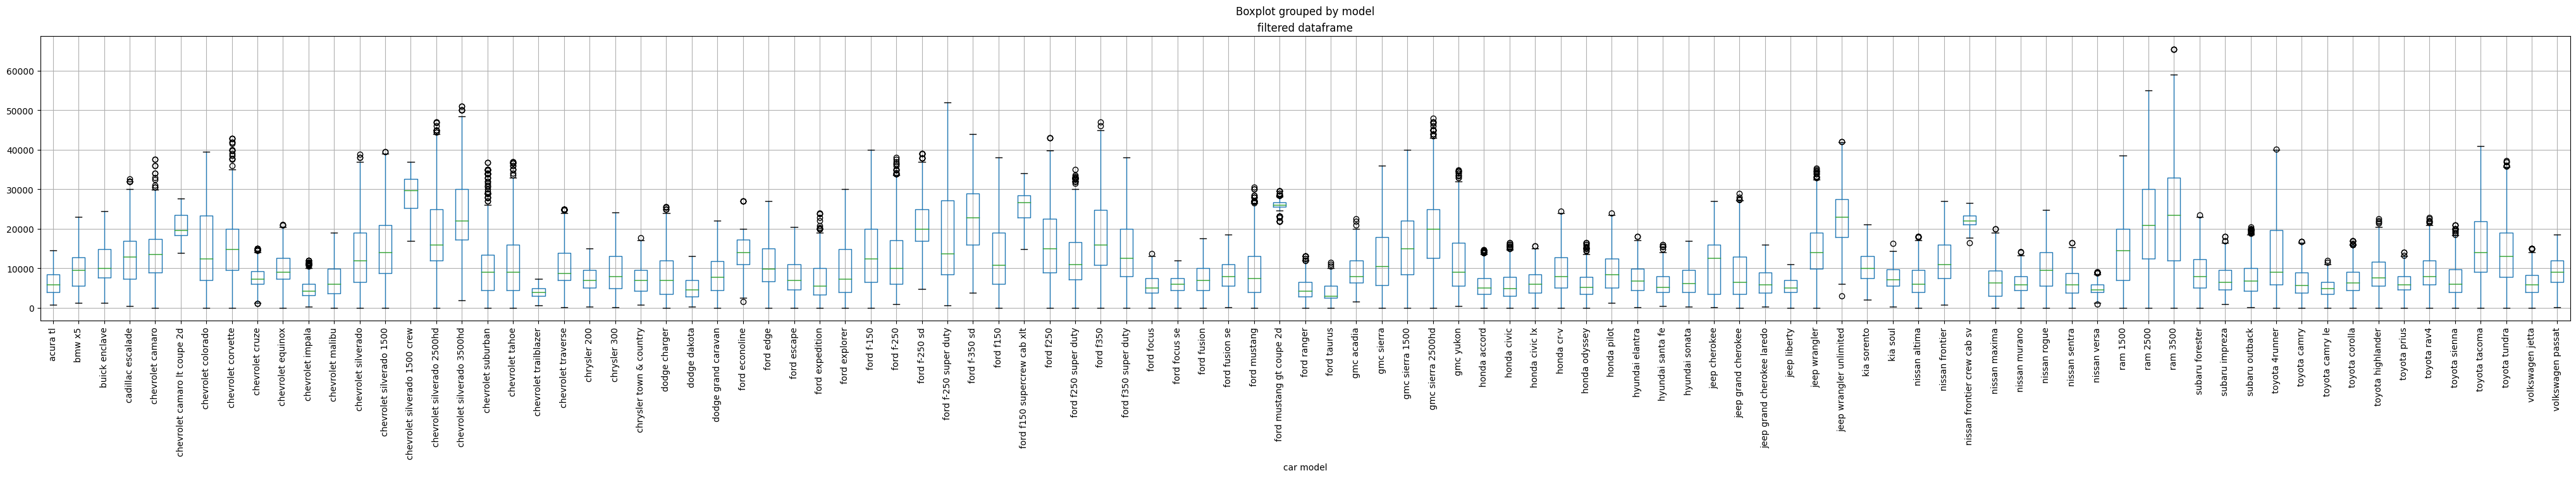

In [52]:
df_price_age_filtered.boxplot(column='price', by='model', figsize=(50, 6))
plt.xticks(rotation=90)
plt.title('filtered dataframe')
plt.xlabel('car model')
plt.show()

Of course there are still outliers but they are definetly less

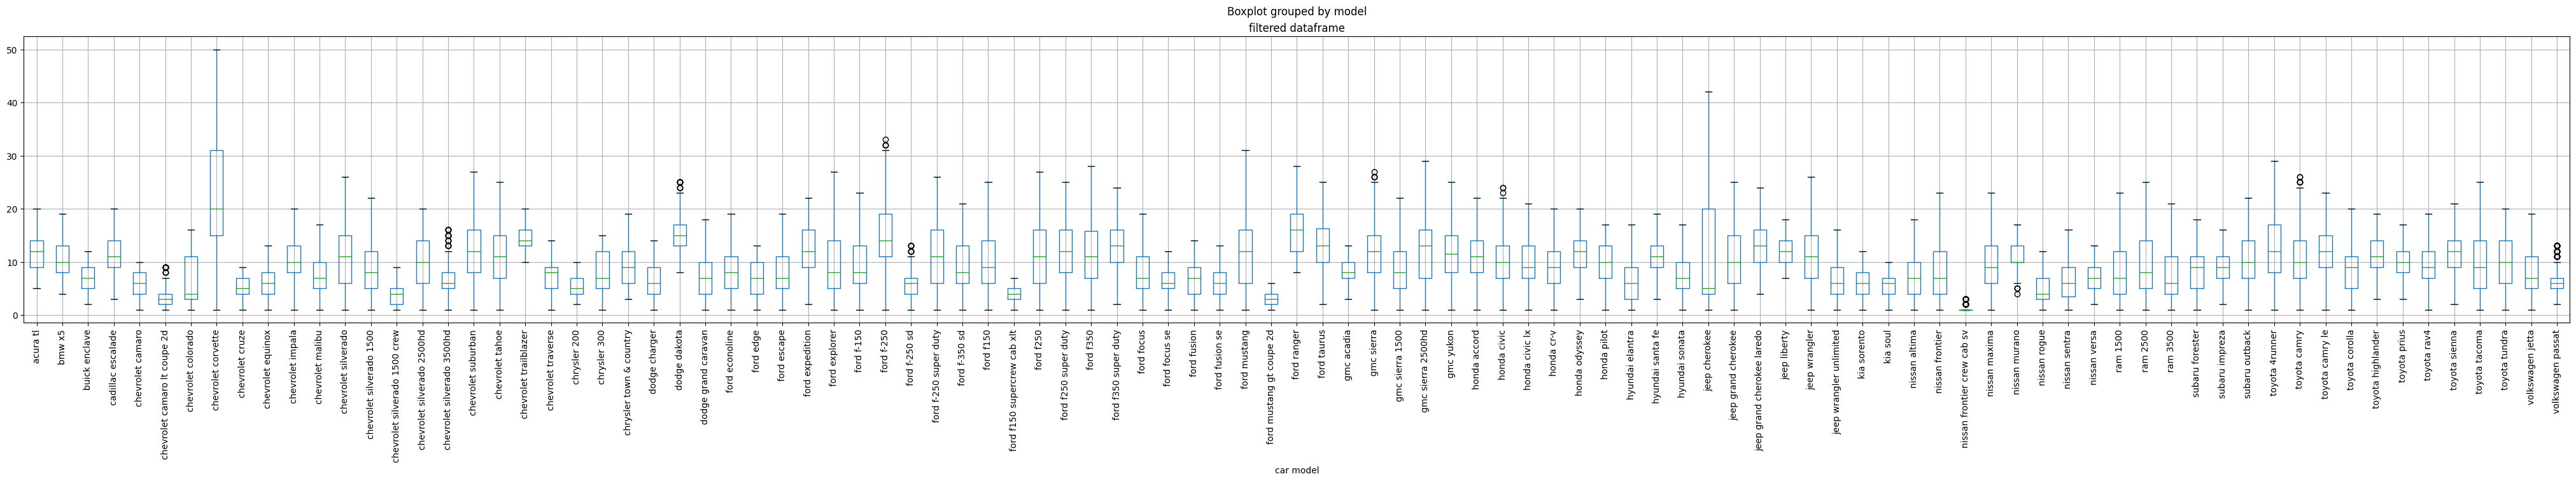

In [53]:
df_price_age_filtered.boxplot(column='car_age', by='model', figsize=(50, 6))
plt.xticks(rotation=90)
plt.title('filtered dataframe')
plt.xlabel('car model')
plt.show()

The difference with the original dataframe is more remarkable as the other ones

And now lets see boxplots  with no model distinction

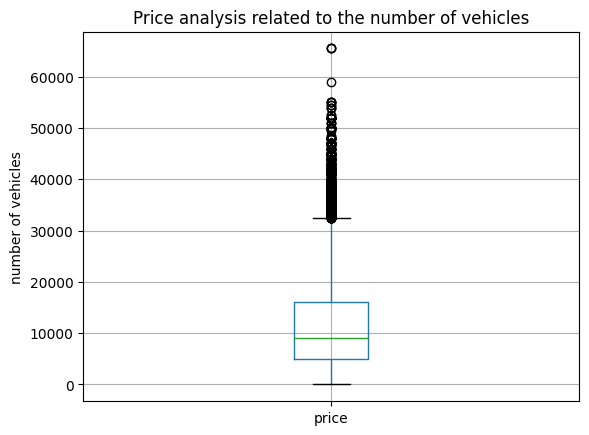

In [54]:
df_price_age_filtered.boxplot(column='price')
plt.title('Price analysis related to the number of vehicles')
plt.ylabel('number of vehicles')
plt.show()

The y range has decreased substantially and this is a good sign of filtration

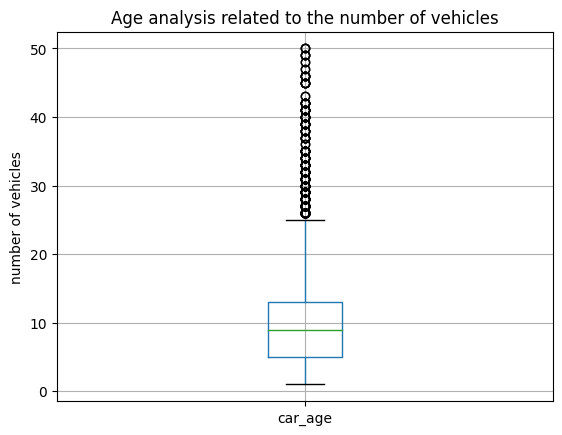

In [55]:
df_price_age_filtered.boxplot(column='car_age')
plt.title('Age analysis related to the number of vehicles')
plt.ylabel('number of vehicles')
plt.show()

Here as well we can appreciate a good filtration because the outliers are much less.

### 3.2 Studying main parameters with outliers filtration <a id='Studying_main_parameters_with_outliers_filtration'></a>

Now we use the filtered dataframe to create new histograms and compare them with the original

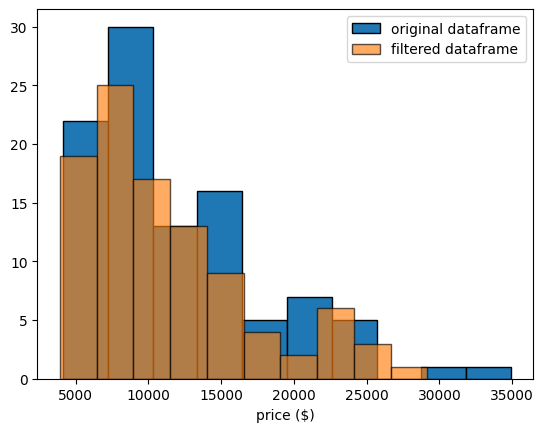

In [56]:
mean_price_filt = df_price_age_filtered.pivot_table(index='model', values='price')
plt.hist(mean_price, edgecolor = 'black', label= 'original dataframe')
plt.hist(mean_price_filt, edgecolor = 'black', alpha = 0.65, label= 'filtered dataframe')
plt.legend(loc='upper right')
plt.xlabel('price ($)')
plt.show()

Cool ! The price outliers are disapperead 

Lets do the same with mean age as well:

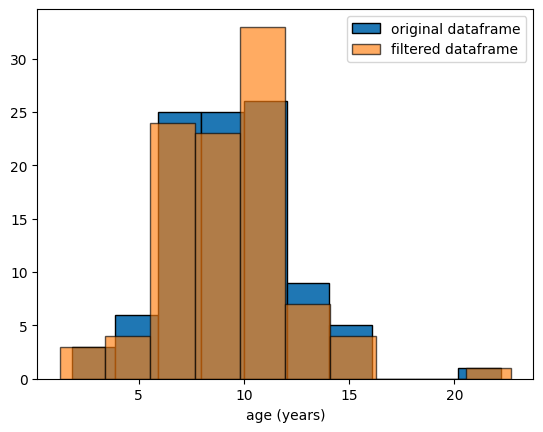

In [57]:
mean_car_age_filt = df_price_age_filtered.pivot_table(index='model', values='car_age')
plt.hist(mean_car_age, edgecolor = 'black', label= 'original dataframe')
plt.hist(mean_car_age_filt, edgecolor = 'black', alpha = 0.65, label= 'filtered dataframe')
plt.legend(loc='upper right')
plt.xlabel('age (years)')
plt.show()

For an unknown reason, also the filterd dataframe present an outliers. It may be the case to filter the outliers once more but in this case we keep it like this.

### 3.3 Ad placement period <a id='Ad_placement_period'></a>

Lets see model by model how many days cars have been posted taking into account mean and median value and have them arranged in descending order.

In [58]:
time_posted_by_model = df_price_age_filtered.groupby('model').agg({'days_listed': ['median', 'mean']}).astype('int')
time_posted_by_model.columns = ['median', 'mean']
time_posted_by_model.sort_values(by='median', ascending=False, inplace=True)
time_posted_by_model

,median,mean
model,,
ford f-350 sd,37,41
toyota camry le,36,40
ford taurus,36,42
chevrolet suburban,36,42
ford f-250 sd,36,41
...,...,...
chrysler 200,31,39
volkswagen passat,31,37
honda pilot,30,37


Lets see now the period of habitual placement of an ad.

In [59]:
df_price_age_filtered.groupby('day_posted')['day_posted'].count().sort_values(ascending=False)

day_posted
3    7137
5    7009
4    6996
0    6959
6    6943
2    6932
1    6917
Name: day_posted, dtype: int64

In [60]:
df_price_age_filtered.groupby('month_posted')['month_posted'].count().sort_values(ascending=False)

month_posted
10    4394
12    4360
3     4297
5     4283
9     4267
7     4249
8     4248
1     4208
11    4152
6     4005
2     3784
4     2646
Name: month_posted, dtype: int64

This means that most of the publication occur on Thursday and October

Now we are going to determine when posts are quickly removed and when they are running for a long time

In [61]:
table_type = df_price_age_filtered.groupby("type")["days_listed"].describe()
table_type.sort_values(by='50%', ascending=False, inplace=True)
table_type

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
bus,11.0,36.090909,22.088253,7.0,18.00,38.0,51.5,74.0
hatchback,961.0,40.731530,29.701654,0.0,19.00,35.0,56.0,267.0
wagon,1472.0,40.601223,30.512693,1.0,18.75,34.0,53.0,240.0
SUV,11780.0,39.807555,28.251404,0.0,19.00,33.0,54.0,243.0
convertible,385.0,39.540260,28.967278,0.0,19.00,33.0,52.0,190.0
coupe,2039.0,39.361942,28.918016,0.0,19.00,33.0,52.0,256.0
mini-van,1098.0,39.656648,28.933261,0.0,19.00,33.0,53.0,173.0
other,239.0,38.497908,26.559253,4.0,19.00,33.0,50.5,151.0
pickup,6682.0,39.258605,27.565712,0.0,19.00,33.0,53.0,225.0


So, taking into account the median value, bus is the type of vehicle that takes longer to be sold whereas van take less. Anyway we can detect some atipical max values well beyond the mean and median values

Without considering the vehicle type, lets see how many days_listed could be considered abnormally long and how many publication days could be considered abnormally short.

In [62]:
df_price_age_filtered['days_listed'].describe()

count    48893.000000
mean        39.556603
std         28.209757
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

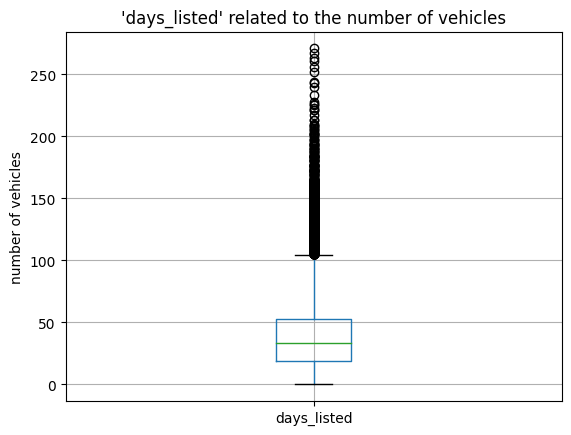

In [63]:
df_price_age_filtered.boxplot(column='days_listed')
plt.title("'days_listed' related to the number of vehicles")
plt.ylabel('number of vehicles')
plt.show()

So, generally speaking, all the values above 100 days could be considered outliers.

### 3.4 Average price for each type of vehicle <a id='avg_price_per_vehicle'></a>

Lets now consider the average price for each type of vehicle.

In [64]:
price_by_type = df_price_age_filtered.groupby('type').agg({'price': ['median', 'mean']})
price_by_type.columns = ['median', 'mean price']
price_by_type.sort_values(by='median', ascending=False, inplace=True)
price_by_type

,median,mean price
type,,
truck,14995.0,16139.065728
pickup,14275.0,15835.070039
offroad,12500.0,14438.449735
convertible,12000.0,12875.457143
coupe,11950.0,13403.118195
other,8995.0,10702.435146
SUV,8500.0,10273.586418
wagon,7900.0,8801.200408
van,6999.0,7847.879562


The type of vehicles sold for the highest price are the trucks whereas hatchback are sold with the lowest price

Lets now draw a graph showing the number of advertisements on each type of vehicle.

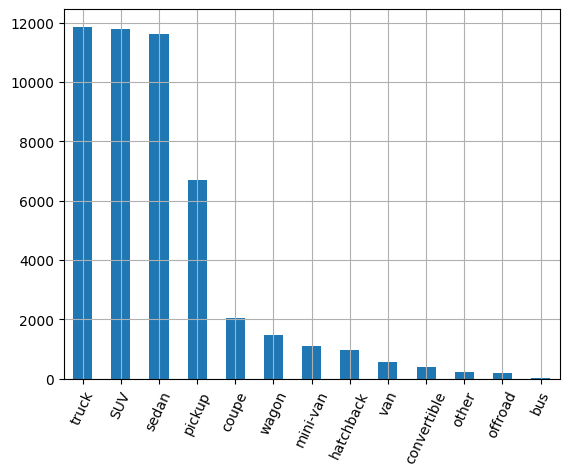

In [65]:
df_price_age_filtered['type'].value_counts().plot(kind='bar', grid=True)
plt.xticks(rotation=65)
plt.show()

SUV and truck type are the most posted

### 3.5 Price factor <a id='price_factor'></a>

Lets see now which factors impact the price the most. To do that we take each of the most popular types of vehicle we discovered in the previous step (truck and suv) and see if the price depends on age, mileage, condition, transmission type, and color.

First step to do so is create a new dataframe that take into account only Truck type vehicles

In [66]:
truck_filter = df_price_age_filtered['type'] == 'truck'
truck = df_price_age_filtered[truck_filter]

Since the last dataframe has 18 column but we need just need 6 we have to eliminate some columns

In [67]:
new_truck = truck.drop(['model_year', 'model', 'condition', 'cylinders', 'fuel', 'is_4wd', 'date_posted', 'days_listed', 'miles/year', 'day_posted', 'month_posted'], axis='columns')

Lets use now the correlation matrix:

In [68]:
new_truck.corr()

C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\3802082992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_truck.corr()


,price,odometer,car_age,condition_ind
price,1.000000,-0.445982,-0.619104,0.320612
odometer,-0.445982,1.000000,0.500883,-0.323789
car_age,-0.619104,0.500883,1.000000,-0.329230
condition_ind,0.320612,-0.323789,-0.329230,1.000000


As we could imagine, price and milage are inversely proportional. Same for price and age while, of course the price raises with better conditions

To analyze the correlation with categorical variables (transmission type and color) we use boxplot

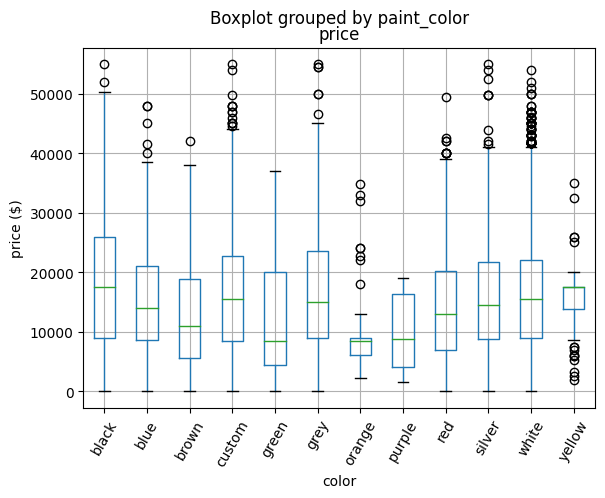

In [69]:
new_truck.boxplot(column='price', by='paint_color')
plt.xticks(rotation=60)
plt.xlabel('color')
plt.ylabel('price ($)')
plt.show()

It seems that black vehicles are generally more expensive

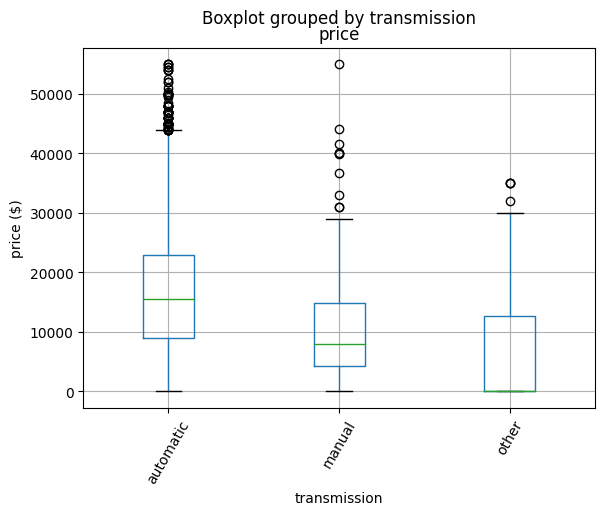

In [70]:
new_truck.boxplot(column='price', by='transmission')
plt.xticks(rotation=60)
plt.xlabel('transmission')
plt.ylabel('price ($)')
plt.show()

Of course, automatic gearbox vehicles are more expensive than manual

Lets repeat for the second most posted type of vehicle: SUV

In [71]:
suv_filter = df_price_age_filtered['type'] == 'SUV'
suv = df_price_age_filtered[suv_filter]

Since the last dataframe has 18 column but we need just need 6 we have to eliminate some columns

In [72]:
new_suv = suv.drop(['model_year', 'model', 'condition', 'cylinders', 'fuel', 'is_4wd', 'date_posted', 'days_listed', 'miles/year', 'day_posted', 'month_posted'], axis='columns')

Lets use now the correlation matrix:

In [73]:
new_suv.corr()

C:\Users\vidam\AppData\Local\Temp\ipykernel_17444\2955656834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_suv.corr()


,price,odometer,car_age,condition_ind
price,1.000000,-0.469271,-0.563587,0.263087
odometer,-0.469271,1.000000,0.534743,-0.351129
car_age,-0.563587,0.534743,1.000000,-0.315385
condition_ind,0.263087,-0.351129,-0.315385,1.000000


The behaviour is pretty similar as the truck type

To analyze the correlation with categorical variables (transmission type and color) we use boxplot

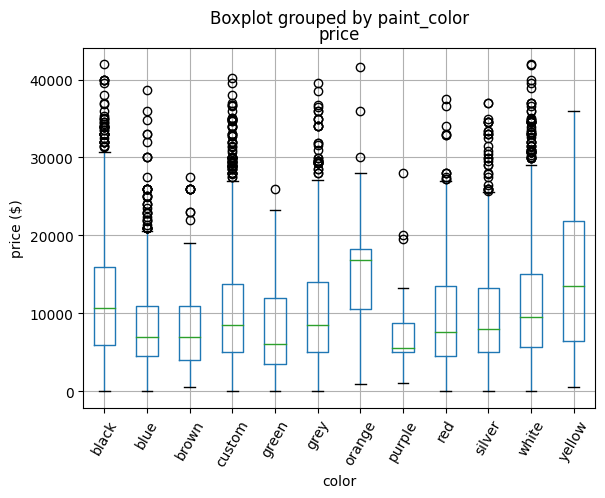

In [74]:

new_suv.boxplot(column='price', by='paint_color')
plt.xticks(rotation=60)
plt.xlabel('color')
plt.ylabel('price ($)')
plt.show()

In this case, orange seems to be the most expensive color

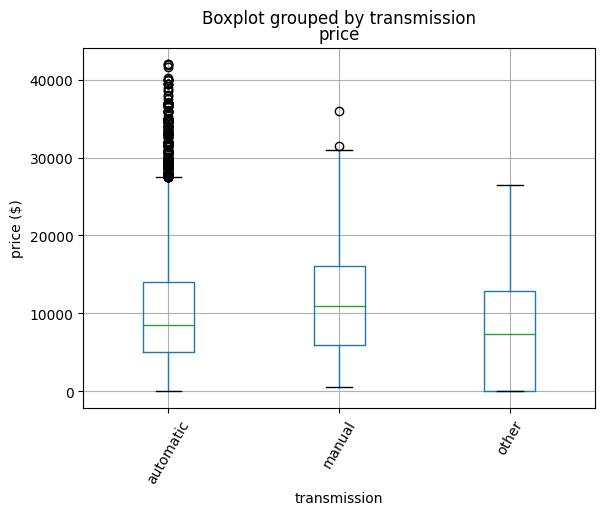

In [75]:
new_suv.boxplot(column='price', by='transmission')
plt.xticks(rotation=60)
plt.xlabel('transmission')
plt.ylabel('price ($)')
plt.show()

It seems weird but for SUV vehicles, manual gearbox is more expensive

Lets focus now on the scatter plot diagrams

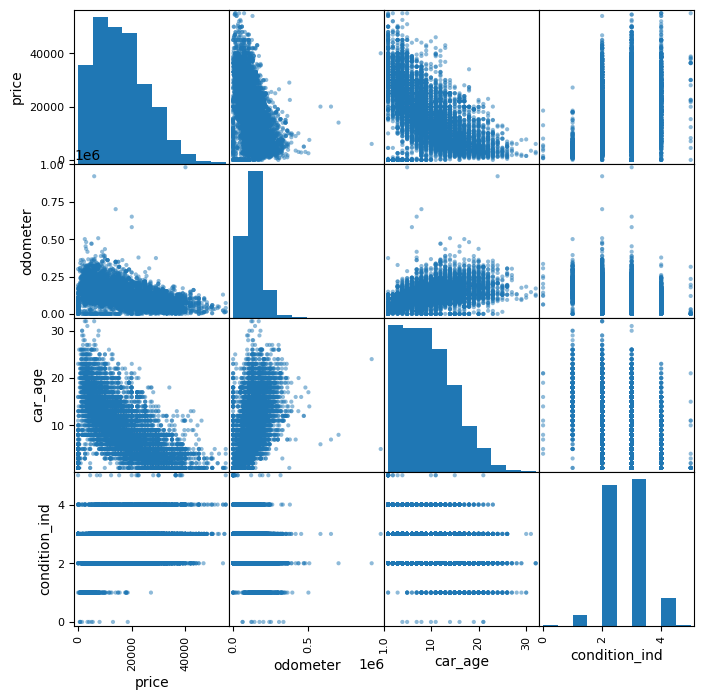

In [76]:
pd.plotting.scatter_matrix(new_truck, figsize=(8, 8)) 
plt.show()

Each cell in this 4x4 grid shows a relationship between a pair of parameters. Let's take a look:

- The top left cell shows the connection between price and price. This is not a scatterplot, but an ordinary histogram showing the distribution of price. We can see that normally cars costs between 8000 and 20000$.
- The cell below shows the connection between price and mileage. The natural trend is that the less mileage the vehicle has the higher it will cost.
- Price and age: similarly as the cell above, the trend is that the less is the age higher it will cost and viceversa.
- The bottom left cell of the scatterplot shows that vehicles in better conditions are generally more expensive. 
- The condition histogram (bottom right) shows that the majority of vehicles are in good and excellent condition.
- The car_age histogram tells us that a large amount of data was collected on vehicles aged less than 15.
- The odometer histogram shows one peaks at 120000 miles. This is apparently the usual mileage for used cars for sale
- On the other side of the diagonal we see identical images of the same data; the axes are reversed

Lets see the second scatter plot diagram:

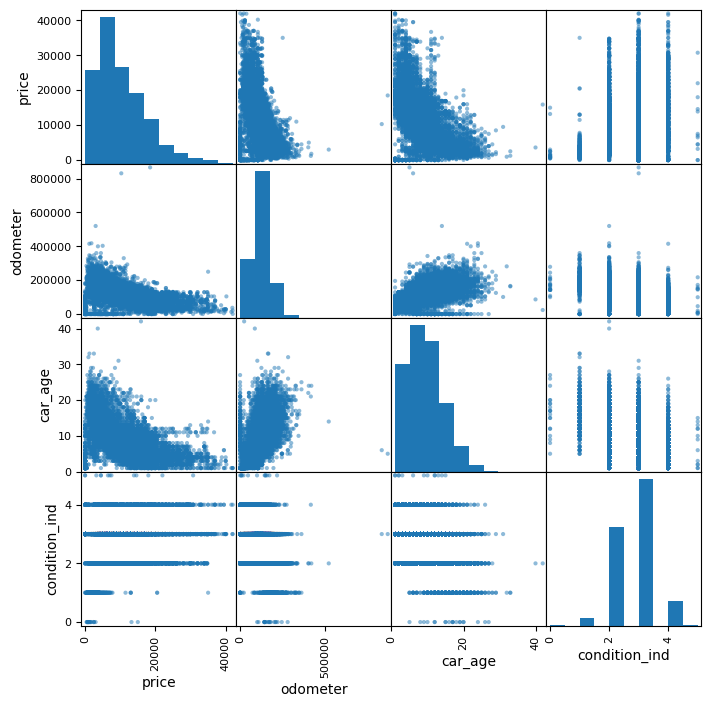

In [77]:
pd.plotting.scatter_matrix(new_suv, figsize=(8, 8)) 
plt.show()

Behaviour is pretty similar as the first one.

## Conclusion <a id='conclusion'></a>

We started our project with a 51525x13 dataframe with 6 columns with null values inside them. First important thing we've done is replacing the absent values in 'model_year' with the median value of the rows with the same 'model' using a lambda function. We did the same with 'cylinder' and 'odometer'. The null values in 'paint_color' column have been replaced with 'custom', already present among the data. The 'is_4wd' columns has been filled just adding zeros to absent values. After that we changed some type format. We added some columns:
- car_age
- miles/year
- condition_ind
- day_posted
- month_posted.

After that we studied the principal parameters (price, car age, mileage, number of cylinders and condition) with histograms and bars charts. Doing so we realized that there were outliers among our data so we did operate to erase them.
Once did so we compared the old and the new filtered dataframe.
Period of posting, average price and price correlation factors have been studied as well